__Описание проекта__  

___Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.___  

___Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.___  

___В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».___  

## Откройте файл с данными и изучите общую информацию

In [273]:
import pandas as pd

In [274]:
data=pd.read_csv('/datasets/games.csv')

In [275]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [276]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


_Вижу, большое количество пропусков в оценках критиков и пользователей , так же пропуски в годах выхода игр, так же стоит заменить тип у столбца user_score на вещественный и привести названия столбцов к нижнему регистру_

## Подготовьте данные

In [277]:
data.columns = map(str.lower, data.columns)
data.head(30)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [278]:
data=data.dropna(subset=['genre']) 
data.loc[data['genre'].isna()]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [279]:
data=data.replace('tbd','NaN')
data.query('user_score=="tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [280]:
data['user_score']=data['user_score'].astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


In [281]:
data['rating']=data['rating'].fillna('unknown')

In [282]:
data['critic_score'].isna().sum()

8576

In [283]:
mean_critic_score=data.groupby('platform')['critic_score'].transform('mean')

In [284]:
data['critic_score'].fillna(mean_critic_score,inplace=True)
data['critic_score'].isna().sum()

1118

In [285]:
mean_user_score=data.groupby('platform')['user_score'].transform('mean')

In [286]:
data['user_score'].fillna(mean_user_score,inplace=True)
data['user_score'].isna().sum()

1118

__Заменила значения tbd в столбце user_score на пропуски , т.к. tbd означает -"to be determinated" ,то есть будет изменен__  

__Заменили тип данных у значений столбца user_score на float, что бы можно было проводить операции со значениями__  

__Не стала заменять или удалять  пропуски в столбце year_of_release ,т.к их не слишком много (около 300), и не нашла на что можно их заменить ,не исказив данные__  

__Посмотрев строки с пропусками в столбце genre, решила их удалить , т.к их всего 2 и у этих же строк пропуск в названии игры__  
__В столбце rating заменила пропуски на unknown, т.к пропусков достаточно много (около 35%), и создание такой категории может помочь в дальнейшем при анализе__

__Заполнила большую часть пропусков в столбцах user_score и critic_score средними значениями по платформе__ 

__Заменила пропуски в столбце с рейтингом на категорию unknown__



In [287]:
data['total_sales']=data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


## Проведите исследовательский анализ данных

__Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?__

In [288]:
data_years=data.groupby('year_of_release').agg(games=('name','count'))
data_years

,games
year_of_release,
1980.0,9
1981.0,46
1982.0,36
1983.0,17
1984.0,14
1985.0,14
1986.0,21
1987.0,16
1988.0,15


<AxesSubplot:title={'center':'График выхода игр по годам'}, xlabel='year_of_release'>

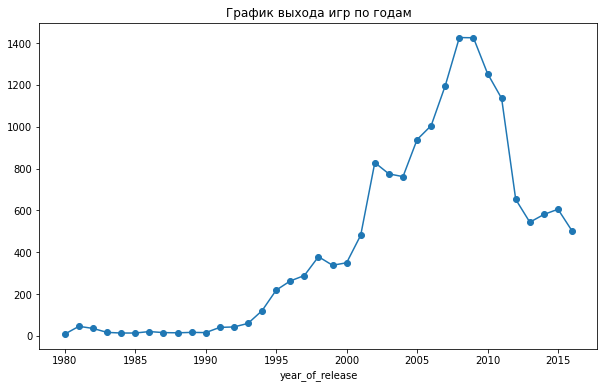

In [289]:
data.groupby('year_of_release')['name'].count().plot(x="year_of_release",style="-o",figsize=(10,6),title='График выхода игр по годам')

In [290]:
platform_sales=data.groupby(['platform','year_of_release']).agg(sales_by_years_by_platform=('total_sales','sum')).sort_values(by='sales_by_years_by_platform',ascending=False).head(40)
platform_sales.sort_values(by='year_of_release')

sales_by_years_by_platform
platform year_of_release                            
PS       1996.0                                94.70
         1997.0                               136.17
         1998.0                               169.49
         1999.0                               144.53
         2000.0                                96.37
PS2      2001.0                               166.43
GBA      2002.0                                74.16
PS2      2002.0                               205.38
         2003.0                               184.31
GBA      2004.0                                77.91
PS2      2004.0                               211.81
         2005.0                               160.66
DS       2005.0                               130.14
Wii      2006.0                               137.15
PS2      2006.0                               103.42
DS       2006.0                               119.81
         2007.0                               146.94
X360     2007.0                                95.41
PS2      2007.0                                75.99
Wii      2007.0                               152.77
DS       2008.0                               145.31
Wii      2008.0                               171.32
X360     2008.0                               135.26
PS3      2008.0                               118.52
Wii      2009.0                               206.97
PS3      2009.0                               130.93
X360     2009.0                               120.29
DS       2009.0                               119.54
Wii      2010.0                               127.95
X360     2010.0                               170.03
PS3      2010.0                               142.17
DS       2010.0                                85.02
X360     2011.0                               143.84
PS3      2011.0                               156.78
         2012.0                               107.36
X360     2012.0                                99.74
PS3      2013.0                               113.25
X360     2013.0                                88.58
PS4      2014.0                               100.00
         2015.0                               118.90

__Вывод:__

__Посмотрев распределение выпуска игр по годам , видно что больше всего игр выпускалось с 2002 по 2011 год, далее наблюдается небольшой спад__  
__Эти данные ,на мой взгяд важны, т.к. при анализе продаж , важно учитывать и количество игр (т.е если с 2012 года падают продажи , на это так же повлияло и количество выпущенных игр)__  

___Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?___

In [291]:
platform_sales1=data.groupby('platform').agg(sales_by_platform=('total_sales','sum')).sort_values(by='sales_by_platform',ascending=False).head(10)
platform_sales1

,sales_by_platform
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


<AxesSubplot:xlabel='year_of_release'>

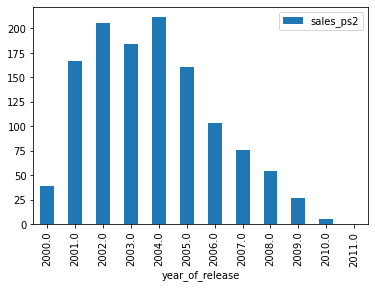

In [292]:
platform_ps2=data.loc[data['platform']=='PS2'].groupby('year_of_release').agg(sales_ps2=('total_sales','sum'))
platform_ps2.plot(kind='bar')


<AxesSubplot:xlabel='year_of_release'>

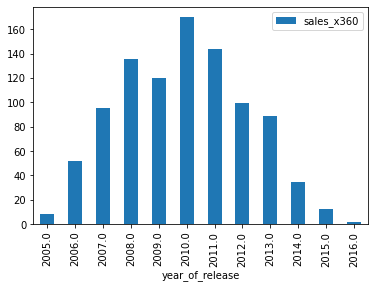

In [293]:
platform_x360=data.loc[data['platform']=='X360'].groupby('year_of_release').agg(sales_x360=('total_sales','sum'))
platform_x360.plot(kind='bar')

<AxesSubplot:xlabel='year_of_release'>

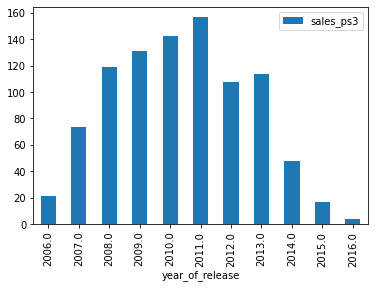

In [294]:
platform_ps3=data.loc[data['platform']=='PS3'].groupby('year_of_release').agg(sales_ps3=('total_sales','sum'))
platform_ps3.plot(kind='bar')


<AxesSubplot:xlabel='year_of_release'>

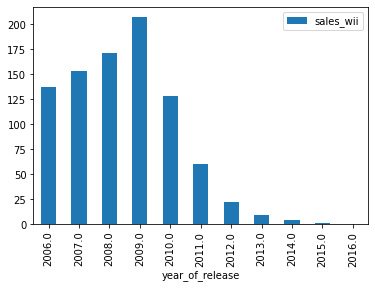

In [295]:
platform_wii=data.loc[data['platform']=='Wii']
platform_wii.groupby('year_of_release').agg(sales_wii=('total_sales','sum')).plot(kind='bar')

<AxesSubplot:xlabel='year_of_release'>

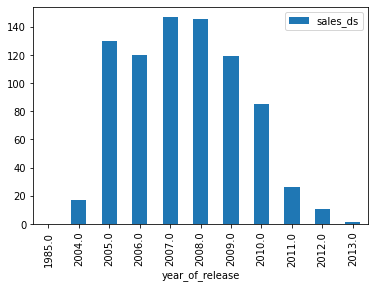

In [296]:
platform_ds=data.loc[data['platform']=='DS']
platform_ds.groupby('year_of_release').agg(sales_ds=('total_sales','sum')).plot(kind='bar')

<AxesSubplot:xlabel='year_of_release'>

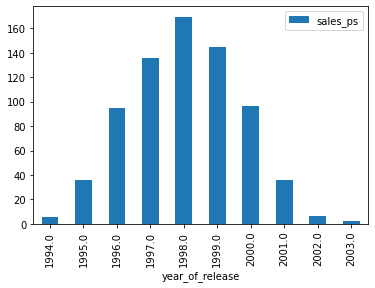

In [297]:
platform_ps=data.loc[data['platform']=='PS']
platform_ps.groupby('year_of_release').agg(sales_ps=('total_sales','sum')).plot(kind='bar')

<AxesSubplot:xlabel='year_of_release'>

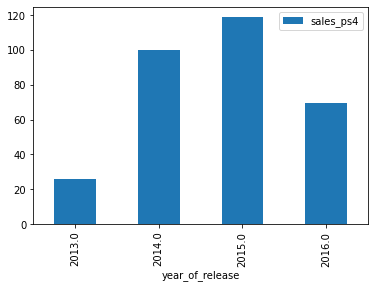

In [298]:
platform_ps4=data.loc[data['platform']=='PS4']
platform_ps4.groupby('year_of_release').agg(sales_ps4=('total_sales','sum')).plot(kind='bar')

__Вывод:__  
__Построив распределение продаж по годам у наиболее продаваемых платформ, например ,рассмотрев платформу PS и ее последующие версии ,видно что срок одной версии -примерно 6 лет (т. е за 6 лет одна версия платформы полностью сменяется следующей)__

___Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год___   

___Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ___ 

<AxesSubplot:xlabel='platform'>

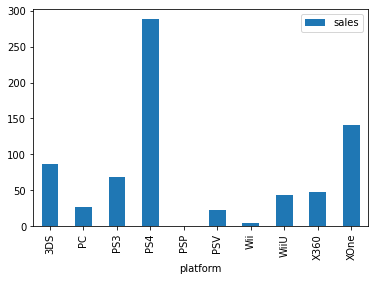

In [299]:
data_actual=data.loc[data['year_of_release']>=2014]
data_actual.head(20)
data_actual.groupby('platform').agg(sales=('total_sales','sum')).plot(kind='bar')

<AxesSubplot:xlabel='year_of_release'>

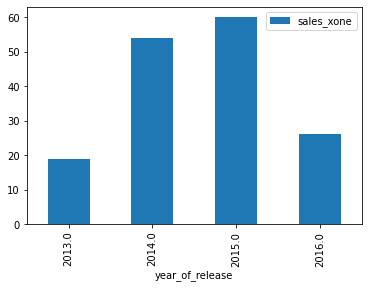

In [300]:
platform_xone=data.loc[data['platform']=='XOne']
platform_xone.groupby('year_of_release').agg(sales_xone=('total_sales','sum')).plot(kind='bar')

<AxesSubplot:xlabel='year_of_release'>

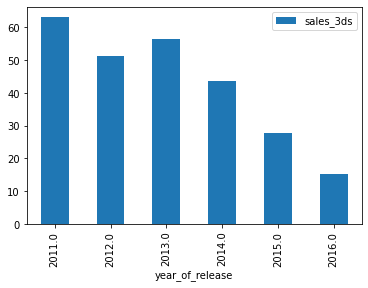

In [301]:
platform_3ds=data.loc[data['platform']=='3DS']
platform_3ds.groupby('year_of_release').agg(sales_3ds=('total_sales','sum')).plot(kind='bar')

<AxesSubplot:xlabel='year_of_release'>

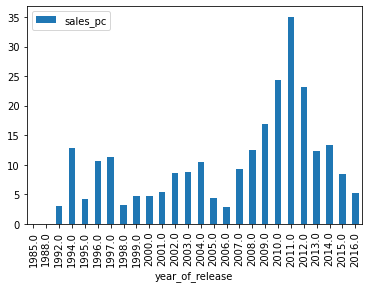

In [302]:
platform_pc=data.loc[data['platform']=='PC']
platform_pc.groupby('year_of_release').agg(sales_pc=('total_sales','sum')).plot(kind='bar')

<AxesSubplot:xlabel='year_of_release'>

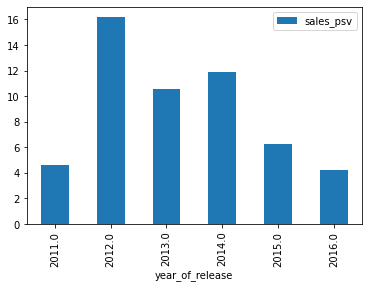

In [303]:
platform_psv=data.loc[data['platform']=='PSV']
platform_psv.groupby('year_of_release').agg(sales_psv=('total_sales','sum')).plot(kind='bar')

<AxesSubplot:xlabel='year_of_release'>

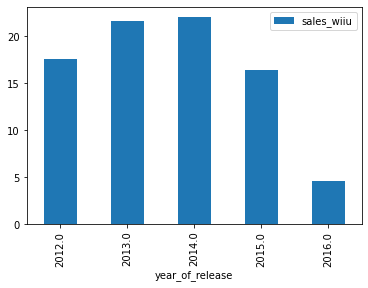

In [304]:
platform_wiiu=data.loc[data['platform']=='WiiU']
platform_wiiu.groupby('year_of_release').agg(sales_wiiu=('total_sales','sum')).plot(kind='bar')

<AxesSubplot:xlabel='year_of_release'>

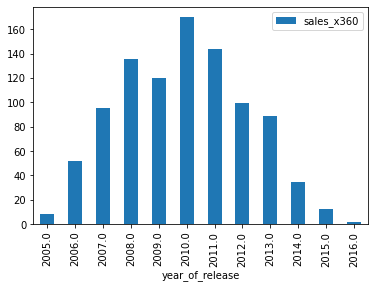

In [305]:
platform_x360=data.loc[data['platform']=='X360']
platform_x360.groupby('year_of_release').agg(sales_x360=('total_sales','sum')).plot(kind='bar')

_Для наглядности выстроим рядом графики выпуска игр по годам для лидирующих платформ_

Text(0.5, 1.0, 'X360')

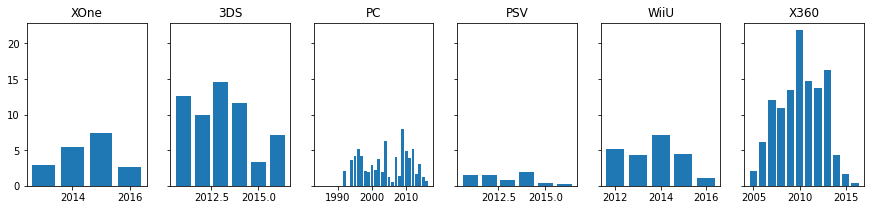

In [306]:
import matplotlib.pyplot as plt


fig, axs = plt.subplots(1,6 , figsize=(15,3), sharey=True)

axs[0].bar(platform_xone['year_of_release'], platform_xone['total_sales'])
axs[1].bar(platform_3ds['year_of_release'], platform_3ds['total_sales'])
axs[2].bar(platform_pc['year_of_release'], platform_pc['total_sales'])
axs[3].bar(platform_psv['year_of_release'], platform_psv['total_sales'])
axs[4].bar(platform_wiiu['year_of_release'], platform_wiiu['total_sales'])  
axs[5].bar(platform_x360['year_of_release'], platform_x360['total_sales'])

axs[0].set_title('XOne')
axs[1].set_title('3DS')
axs[2].set_title('PC')
axs[3].set_title('PSV')
axs[4].set_title('WiiU')
axs[5].set_title('X360')


__Вывод:__  
__В результате анализа продаж игр на разных платформах за последние 3 года (с 2014 по 2016 ), решила отнести к потенциально прибыльным : PS4, XOne, 3DS и WiiU и PC__ 
__PS4 -потому , что по продажам она значительно лидирует , и так же она является последователем одной из самых первых платформ -PS__  
__XOne, 3DS и WiiU -потому , что они так же являются лидерами по продажам за анализируемые 3 года__  
__PC я так же отнесла к потенциально прибыльным ,несмотря на невысокий объем продаж за последние 3 года, потому что , она уже очень давно на рынке (с 1985 года) и все это время у нее достаточно хорошие показатели продаж__  
__У всех лидирующих платформ наблюдается спад продаж в 2016 году. Думаю ,это может быть связано  с возможностью того, что данные за 2016 год-неполные__

___Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат___

<AxesSubplot:xlabel='platform'>

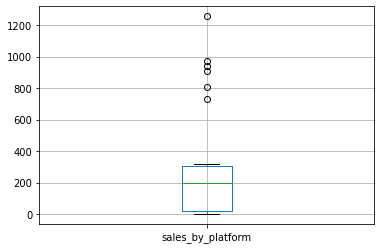

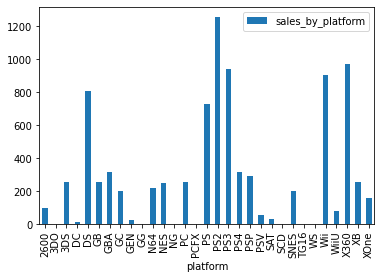

In [307]:
import matplotlib.pyplot as plt
platform_sales2=data.groupby('platform').agg(sales_by_platform=('total_sales','sum'))
platform_sales2.boxplot(column='sales_by_platform')
plt.show
platform_sales2['sales_by_platform'].describe()
platform_sales2.plot(kind='bar')

__Вывод:__
__По графику "ящик с усами" ,построенному по сводной таблице по платформам и объемам продаж, видно ,что медианное значение находится на отметке 200 млн. копий -т.е -большинство платформ имеют такие продажи .Можно сказать ,что продажи более 600 млн. копий -это скорее исключение -явные лидеры продаж__  

___Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
Соотнесите выводы с продажами игр на других платформах___

<AxesSubplot:xlabel='total_sales', ylabel='critic_score'>

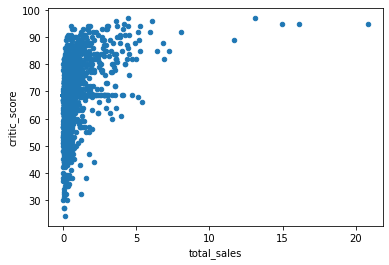

In [308]:
query_ps2=data.query('platform=="PS2"')
query_ps2.plot(x='total_sales',y='critic_score',kind='scatter')




In [309]:
query_ps2['critic_score'].corr(query_ps2['total_sales'])

0.3698353544544398

0.16073129473199776

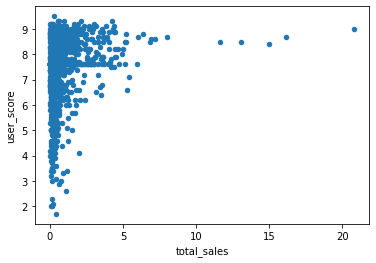

In [310]:

query_ps2.plot(x='total_sales',y='user_score',kind='scatter')
query_ps2['total_sales'].corr(query_ps2['user_score'])


0.11032292129862738

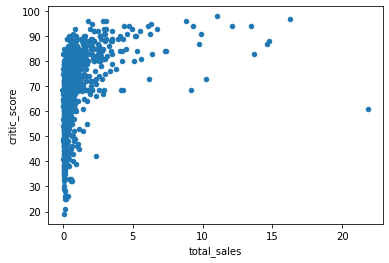

In [311]:
query_x360=data.query('platform=="X360"')
query_x360.plot(x='total_sales',y='critic_score',kind='scatter')
query_x360['total_sales'].corr(query_x360['user_score'])


0.11032292129862738

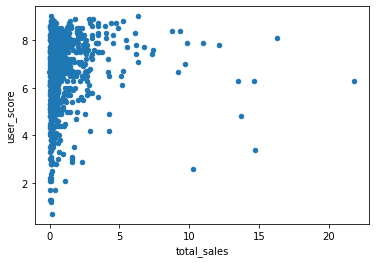

In [312]:
query_x360.plot(x='total_sales',y='user_score',kind='scatter')
query_x360['total_sales'].corr(query_x360['user_score'])


0.22177498783562866

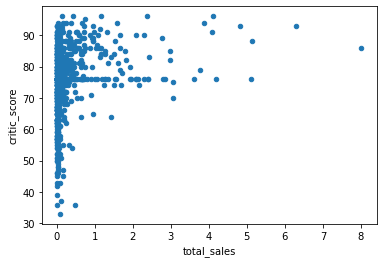

In [313]:
query_pc=data.query('platform=="PC"')
query_pc.plot(x='total_sales',y='critic_score',kind='scatter')
query_pc['total_sales'].corr(query_pc['critic_score'])


0.009177003752450983

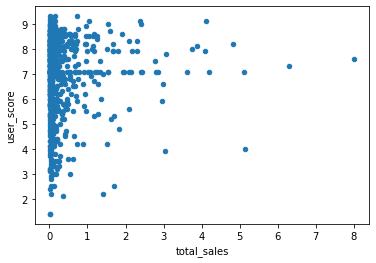

In [314]:
query_pc.plot(x='total_sales',y='user_score',kind='scatter')
query_pc['total_sales'].corr(query_pc['user_score'])

__Вывод:__  
__По диаграмме рассеяния ,построенной для отображения зависимости между продажами платформы PS2 (самой продаваемой за все анализируемое время) и оценками критиков видно, что есть прямая зависимость (около 37% по коэффиценту корреляции Пирсона)__  
__Зависимость между продажами и оценками пользователей так же прямая , но небольшая (около 16%)__  
__Построив подобные диаграммы рассеяния еще для 2 платформ , я так же заметила низкую прямую корреляцию между оценками пользователей и продажами__   
__Можно предположить, что оценки пользователей мало влияют на продажи, оценки критиков чуть больше__
 

___Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?___

<AxesSubplot:xlabel='genre'>

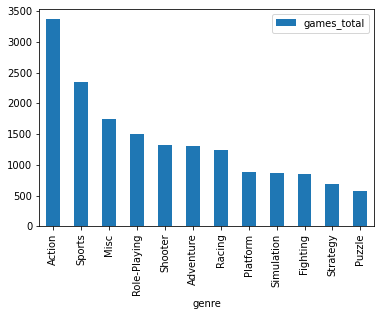

In [354]:
data.groupby('genre').agg(games_total=('name','count')).sort_values(by='games_total',ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='genre'>

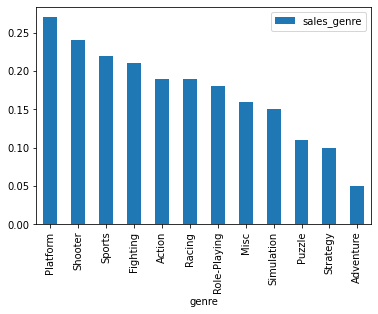

In [355]:
data.groupby('genre').agg(sales_genre=('total_sales','median')).sort_values(by='sales_genre',ascending=False).plot(kind='bar')

__Вывод:__  
__По столбчатой диаграмме выпуска игр различных жанров, видно, что больше всего выпускают игр жанра Action и Sports__  
__По столбчатым диаграммам медианных продаж  игр различных жанров можно сделать вывод , что самые продаваемые жанры -Platform,Shooter,Fighting и Sports, наименее продаваемый -Adventure__  


## Составьте портрет пользователя каждого региона

___Определите для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Опишите различия в долях продаж.
Самые популярные жанры (топ-5). Поясните разницу___

<AxesSubplot:xlabel='platform'>

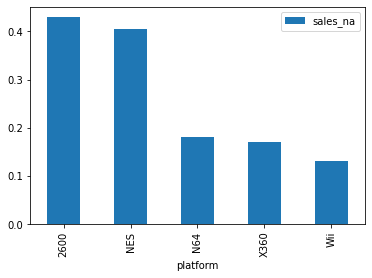

In [356]:
user_na_plt=data.groupby('platform').agg(sales_na=('na_sales','sum')).sort_values(by='sales_na',ascending=False).head()
user_na_plt.plot(kind='bar')

<AxesSubplot:xlabel='genre'>

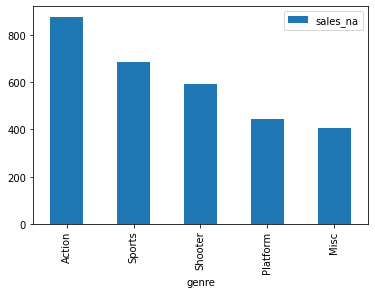

In [318]:
user_na_gnr=data.groupby('genre').agg(sales_na=('na_sales','sum')).sort_values(by='sales_na',ascending=False).head()
user_na_gnr.plot(kind='bar')

<AxesSubplot:xlabel='platform'>

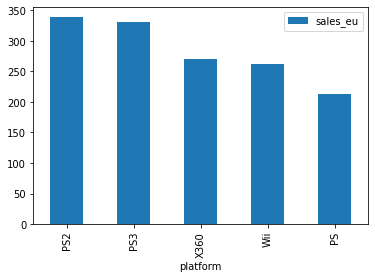

In [319]:
user_eu_plt=data.groupby('platform').agg(sales_eu=('eu_sales','sum')).sort_values(by='sales_eu',ascending=False).head()
user_eu_plt.plot(kind='bar')

<AxesSubplot:xlabel='genre'>

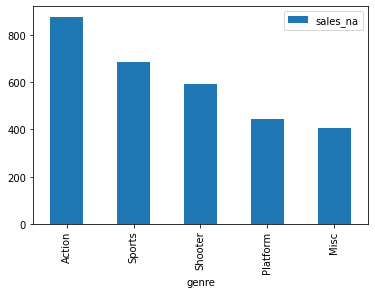

In [320]:
user_eu_gnr=data.groupby('genre').agg(sales_eu=('eu_sales','sum')).sort_values(by='sales_eu',ascending=False).head()
user_na_gnr.plot(kind='bar')

<AxesSubplot:xlabel='platform'>

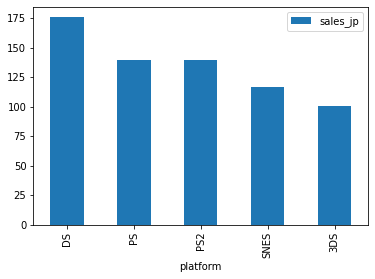

In [321]:
user_jp_plt=data.groupby('platform').agg(sales_jp=('jp_sales','sum')).sort_values(by='sales_jp',ascending=False).head()
user_jp_plt.plot(kind='bar')

<AxesSubplot:xlabel='genre'>

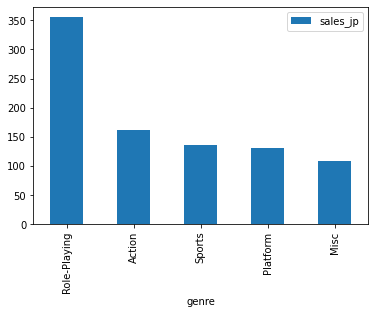

In [322]:
user_jp_gnr=data.groupby('genre').agg(sales_jp=('jp_sales','sum')).sort_values(by='sales_jp',ascending=False).head()
user_jp_gnr.plot(kind='bar')

__Вывод:__  
__Посмотрев на предпочтения жителей различных регионов в жанрах и платформах , можно заключить :__   
__Жители Северной Америки  предпочитают платформы X360, PS2 и Wii, жанры -Action, Sports и Shooter__  
__Жители Европы предпочитают платформы PS2 и PS3, жанры -Action, Sports и Shooter__  
__Жители Японии предпочитают платформы DS,PS и PS2, жанр-Role-Playing__  

___Влияет ли рейтинг ESRB на продажи в отдельном регионе?___

In [352]:
data['rating'].unique()
data.groupby('rating')['name'].count()
#data.query('rating=="AO"')
data=data.replace('RP','unknown')
data=data.replace('EC','E')
data=data.query('rating!="AO"')
data=data.query('rating!="K-A"')
data.groupby('rating')['name'].count().sort_values(ascending=False)

rating
unknown    6767
E          3998
T          2961
M          1563
E10+       1420
Name: name, dtype: int64

_Удалила из таблицы строки с рейтингом AO(только для взрослых -1 строка и K-A-не нашла расшифровки, 3 строки)_

_Рейтинг RP заменила на unknown (т.к. RP означает рейтинг в ожидании)_ 

_8 игр с рейтингом EC(для детей до 3 лет)  отнесла к рейтингу E (для всех)_ 

_Расшифруем оставшиеся рейтинги :_   

_-E(Everyone) - для всех_  

_-E10+ - для детей старше 10 лет_  

_-M - для подростков старше 17 лет_  

_-Т - для подростков 13-17 лет_

In [324]:
data_rt_na=data.groupby('rating')['na_sales'].sum()
data_rt_na


rating
E          1294.52
E10+        353.32
M           748.48
T           759.75
unknown    1240.68
Name: na_sales, dtype: float64

In [325]:
data_rt_eu=data.groupby('rating')['eu_sales'].sum()
data_rt_eu

rating
E          710.36
E10+       188.52
M          483.97
T          427.03
unknown    613.38
Name: eu_sales, dtype: float64

In [326]:
data_rt_jp=data.groupby('rating')['jp_sales'].sum()
data_rt_jp

rating
E          198.11
E10+        40.20
M           64.24
T          151.40
unknown    841.93
Name: jp_sales, dtype: float64

_Для наглядности построила пайчарты с распределением продаж игр по рейтингам  в регионах_ 

Text(0.5, 1.0, 'В Японии')

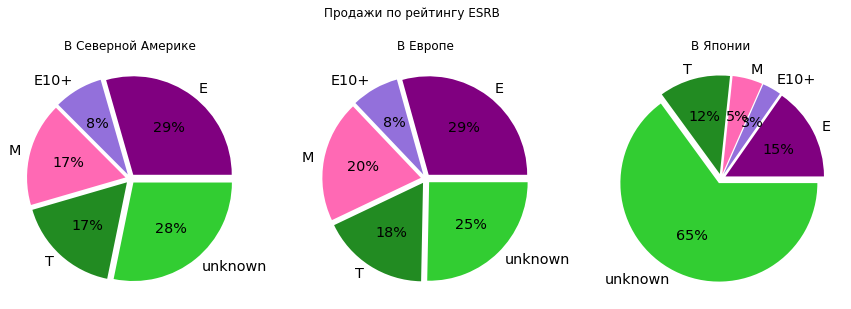

In [327]:
import matplotlib.pyplot as plt

colors=['purple','mediumpurple','hotpink','forestgreen','limegreen']
explode=[0.05,0.05,0.05,0.05,0.05]

fig,axs= plt.subplots(1,3,figsize=(15,5))
fig.suptitle('Продажи по рейтингу ESRB')
data_rt_na.plot(kind='pie',subplots=True,ax=axs[0],textprops={'size':'x-large'},
                autopct='%1.0f%%',legend=False,colors=colors,explode=explode,ylabel='');
axs[0].set_title('В Северной Америке')

colors=['purple','mediumpurple','hotpink','forestgreen','limegreen']
explode=[0.05,0.05,0.05,0.05,0.05]

data_rt_eu.plot(kind='pie',subplots=True,ax=axs[1],textprops={'size':'x-large'},
                autopct='%1.0f%%',legend=False,colors=colors,explode=explode,ylabel='');
axs[1].set_title('В Европе')

colors=['purple','mediumpurple','hotpink','forestgreen','limegreen']
explode=[0.05,0.05,0.05,0.05,0.05]

data_rt_jp.plot(kind='pie',subplots=True,ax=axs[2],textprops={'size':'x-large'},
                autopct='%1.0f%%',legend=False,colors=colors,explode=explode,ylabel='');
axs[2].set_title('В Японии')




__Вывод:__  
__Построив сводную таблицу по продажам в каждом регионе распределенным по играм с различным рейтингом ERSB,а так же посмотрев ,сколько в целом выпускают игр различного рейтинга ,можно сделать вывод, что и выпускают и покупают больше всего игр без рейтинга,с рейтингом :E(для всех), Т (для подростков 13-19 лет ) и М(для подростков старше 17 лет), меньше всего покупают игр для детей от 10 лет__  
__Так же можно заметить , что в Японии больше чем в Европе и Америке пользуются спросом игры без рейтинга(65% против 25% и 28%), и меньше -с рейтингом M(5% против 20% и 17%)__


In [328]:
data.query('platform=="XOne"')['user_score'].isna().sum()

0

In [345]:
data.query('platform=="PC"')['user_score'].isna().sum()

0

##  Проверьте гипотезы

___Проверим гипотезы:    
H0: Средние пользовательские рейтинги платформ XOne и PC равны  
H1: Средние пользовательские рейтинги платформ XOne и PC не равны___

In [335]:
from scipy import stats as st
import numpy as np

score_xone=data.query('platform=="XOne"')['user_score']
score_pc=data.query('platform=="PC"')['user_score']

alpha=.05

results = st.ttest_ind(
    score_xone, 
    score_pc)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 


p-значение: 1.5630150897698028e-08
Отвергаем нулевую гипотезу


__Вывод:__  
__В результате проверки т-тестом, пришлось  отказаться от нулевой гипотезы-значение pvalue слишком маленькое__  

___Проверим гипотезы:  
Но:Средние значения пользовательского рейтинга жанра Action и Sports разные  
H1:Cредние значения пользовательского рейтинга жанров Action и Sports одинаковые___

In [347]:
data.query('genre=="Action"')['user_score'].isna().sum()

0

In [348]:
data.query('genre=="Sports"')['user_score'].isna().sum()

0

In [351]:
score_action=data.query('genre=="Action"')['user_score']
score_sports=data.query('genre=="Sports"')['user_score']

alpha=.05

results = st.ttest_ind(
    score_action, 
    score_sports)

print('p-значение:', results.pvalue)

if results.pvalue >= alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 




p-значение: 0.50612597052943
Отвергаем нулевую гипотезу


__Вывод:__  
__В результате проверки т-тестом , отвергаем нулевую гипотезу-есть достаточная вероятность , что исследемые средние не разные__

## Напишите общий вывод

__Общий вывод:__  

__Для выявления определяющих успешность игры закономерностей я произвела подготовку и последующий исследовательский анализ имеющихся у меня данных о прадажах компьютерных игр.__ 

__Подготовка данных включила в себя запонение пропушенных значений в столбцах user_score и critic_score медианным значением соответствующей платформы, обработка значений tbd в столбце user_score(замена его на NaN), значения рейтинга : AO и K-A было решено удалить ,а EC присоединить к E,так же пропуски в рейтинге объединила в отдельную группу "unknown"-т.е-без рейтинга__

__Исследовательский анализ выявил следующие закономерности :__  

__Посмотрев распределение выпуска игр по годам (с 1980 по 2016) , видно что больше всего игр выпускалось с 2002 по 2011 год(от 829 до 1427 игр), далее наблюдается небольшой спад__  

__Срок выпуска и продаж одной версии платформы -примерно 6 лет ,т. е за 6 лет одна версия платформы полностью сменяется следующей(на примере платформы PS)__  

__В результате анализа продаж игр на разных платформах за последние 3 года (с 2014 по 2016 ), решила отнести к потенциально прибыльным : PS4, XOne, 3DS и WiiU и PC (PS4 особенно лидирует )__  

__Медианное значение продаж находится на отметке 200 млн. копий -т.е -большинство платформ имеют такие продажи .Можно сказать ,что продажи более 600 млн. копий -это скорее исключение -явные лидеры продаж__  

__По диаграмме рассеяния ,построенной для отображения зависимости между продажами платформы PS2 (самой продаваемой за все анализируемое время) и оценками критиков видно, что есть прямая зависимость (около 37% по коэффиценту корреляции Пирсона)
Зависимость между продажами и оценками пользователей так же прямая , но небольшая (около 16%)
Построив подобные диаграммы рассеяния еще для 2 платформ, я так же заметила низкую корреляцию между оценками пользователей и продажами__

__Самые выпускаемые  жанры -Action и Sports, меньше всего выпускают игр жанра -Puzzle 
Самые продаваемые игры-жанра Platform,Shooter,Fighting и Sports, наименее продаваемые-Adventure___ 

__Жители Северной Америки предпочитают платформы X360, PS2 и Wii, жанры -Action, Sports и Shooter
Жители Европы предпочитают платформы PS2 и PS3, жанры -Action, Sports и Shooter
Жители Японии предпочитают платформы DS,PS и PS2, жанр-Role-Playing__  

__выпускают  больше всего игр без рейтига,с рейтингом E(для всех) , Т (для подростков 13-19 лет ) и М(для подростков старше 17 лет).Так же можно сказать ,что в Японии игры без рейтинга особенно популярны ,а с рейтингом T и M -менее популярны чем в Европе. Игры с рейтингом E10+(для детей от 10 лет) наименее продаваемые во всех регионах__  

__В результате проверки гипотезы , что средние значения пользовательского рейтинга платформ XOne и PC одинаковые , с помощью т-теста , пришлось отвергнуть эту гипотезу__  

__В результате проверки гипотезы , что средние пользовательские оценки игр жанра Action и Sports разные, пришлось отвергнуть эту гипотезу-есть достаточная вероятность , что они одинаковые__  


__Таким образом наиболее продаваемыми могут быть игры ,выпущенные на одной из платформ : PS4, XOne, 3DS ,WiiU и PC  
Относящиеся к жанру Platform,Shooter,Fighting ,Sports ,Action и Roll-Playing 
не имеющих рейтинг ESRB или имеющий один из следующих:  E(для всех) , Т (для подростков 13-19 лет ) и М(для подростков старше 17 лет)__
